# 1. Data

## Data Preprocessing

In [1]:
import pandas as pd
import networkx as nx
import string 
import matplotlib.pyplot as plt
import scipy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
edges = pd.read_csv('/content/drive/MyDrive/hw 5 ADM/edges.csv')

In [4]:
hero_network = pd.read_csv('/content/drive/MyDrive/hw 5 ADM/hero-network.csv')

In [5]:
nodes = pd.read_csv('/content/drive/MyDrive/hw 5 ADM/nodes.csv')

Some of the heroes' names in 'hero-network.csv' are not found in 'edges.csv'. This inconsistency exists for the following reasons:

Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'.
Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.
The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'.

In [6]:
#Removing extra spaces at the end of the hero name
hero_network['hero1'] = hero_network['hero1'].apply(lambda x: x.rstrip())
hero_network['hero2'] = hero_network['hero2'].apply(lambda x: x.rstrip())

In [7]:
#Replace 'SPIDER-MAN/PETER PAR' with 'SPIDER-MAN/PETER PARKER'
hero_network.replace({'SPIDER-MAN/PETER PAR': 'SPIDER-MAN/PETER PARKER'}, inplace = True)

In [8]:
#Removing extra '/'
hero_network['hero1'] = hero_network['hero1'].apply(lambda x: x.rstrip('/'))
hero_network['hero2'] = hero_network['hero2'].apply(lambda x: x.rstrip('/'))
edges['hero'] = edges['hero'].apply(lambda x: x.strip('/'))

In [9]:
#After this we need to remove again the empty spaces at the end
hero_network['hero1'] = hero_network['hero1'].apply(lambda x: x.rstrip())
hero_network['hero2'] = hero_network['hero2'].apply(lambda x: x.rstrip())
edges['hero'] = edges['hero'].apply(lambda x: x.rstrip())

In [10]:
set(hero_network['hero1']).union(set(hero_network['hero2'])) == set(edges['hero'])

False

In [11]:
(set(hero_network['hero1']).union(set(hero_network['hero2']))).difference(set(edges['hero']))

set()

In [12]:
len(set(edges['hero']).difference(set(hero_network['hero1']).union(set(hero_network['hero2']))))

18

### Removing duplicates

In [13]:
hero_network.drop((hero_network[hero_network['hero1'] == hero_network['hero2']]).index, inplace = True)

## Graphs setup

#### First

In [14]:
hero_network

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE
574464,CALLISTO,CALIBAN
574465,CALIBAN,ROGUE


In [15]:
hero_net_g=hero_network.groupby(hero_network.columns.tolist(),as_index=False).size()
hero_net_g

,hero1,hero2,size
0,24-HOUR MAN/EMMANUEL,"FROST, CARMILLA",1
1,24-HOUR MAN/EMMANUEL,KILLRAVEN/JONATHAN R,1
2,24-HOUR MAN/EMMANUEL,M'SHULLA,1
3,3-D MAN/CHARLES CHAN,ANGEL/WARREN KENNETH,1
4,3-D MAN/CHARLES CHAN,ANT-MAN II/SCOTT HAR,1
...,...,...,...
224094,ZZZAX,"RODRIGUEZ, DEBRA",1
224095,ZZZAX,"ROSS, GEN. THADDEUS",2
224096,ZZZAX,"SUMMERS, NATHAN CHRI",1
224097,ZZZAX,TIGRA/GREER NELSON,1


we have the new df 

In [16]:
hero_net_g['size'].describe()

count    224099.000000
mean          2.553492
std           7.285278
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1267.000000
Name: size, dtype: float64

In [17]:
hero_net_g['size'].sort_values()[-100:]

186191     133
148855     133
218821     134
78102      135
91072      135
          ... 
196190     365
85416      366
195966     382
124735     627
142471    1267
Name: size, Length: 100, dtype: int64

In [18]:
G_1 = nx.from_pandas_edgelist(hero_net_g, 'hero1', 'hero2' , edge_attr='size') # dobbiamo scegliere la metrica giusta

AttributeError: ignored

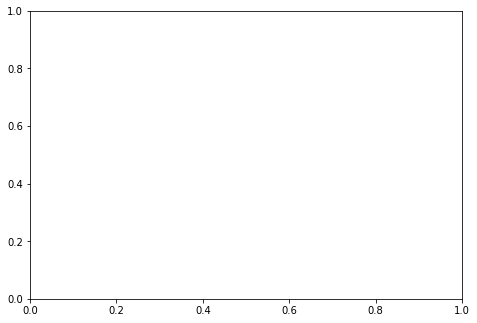

In [19]:
nx.draw(G_1) # mi da errore, forse sono troppi nodi?
plt.show()

#### Second

In [92]:
nodes

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero
...,...,...
19085,"ZOTA, CARLO",hero
19086,ZOTA,hero
19087,ZURAS,hero
19088,ZURI,hero


In [93]:
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


First, we create the normal graph from edges.csv

In [20]:
G_2 = nx.from_pandas_edgelist(edges, 'hero', 'comic')

Then we create two different list that contains only the name of heroes or comics

In [29]:
n_h=nodes[nodes['type'] == 'hero']['node'].tolist()

In [31]:
n_c=nodes[nodes['type'] == 'comic']['node'].tolist()

Now we merge the two lists in a dictionary 

In [35]:
dict_heroes_comics = {key: 'hero' if key in n_h else 'comic' for key in n_c + n_h}

Finally we add at each node of the graph its type

In [36]:
nx.set_node_attributes(G_2, dict_heroes_comics, 'type')

AttributeError: ignored

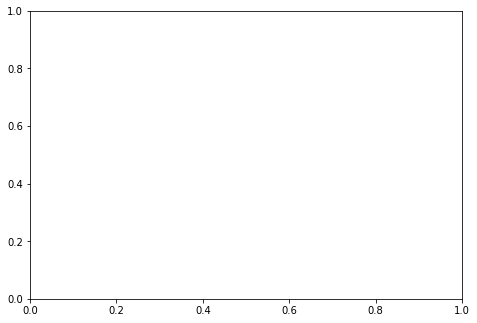

In [39]:
nx.draw(G_2) # mi da errore, forse sono troppi nodi?
plt.show()

# 2. Backend Implementation